In [1]:
# Imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Carregando os Dados

In [2]:
# Carrega o Dataset 
df = pd.read_csv("dados/dataset.csv")

In [3]:
# Shape
df.shape

(45211, 19)

In [4]:
# amostra
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Analise Exploratoria

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [6]:
# Temos valores nulos? Sim ou nao?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [7]:
# temos valores nulos? Quantos?
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [8]:
# Nao usaremos a coluna ID. Vamos remove-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [9]:
# Colunas 
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [10]:
# Valores Ausentes no dataframe
df.isna().any()

age          True
salary       True
balance     False
marital     False
jobedu      False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
dtype: bool

In [11]:
# valores ausentes da variavel age
df.age.isnull().sum()

20

In [12]:
# Calcula o percentual de valores ausentes na variavel age
df.age.isnull().sum()

20

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

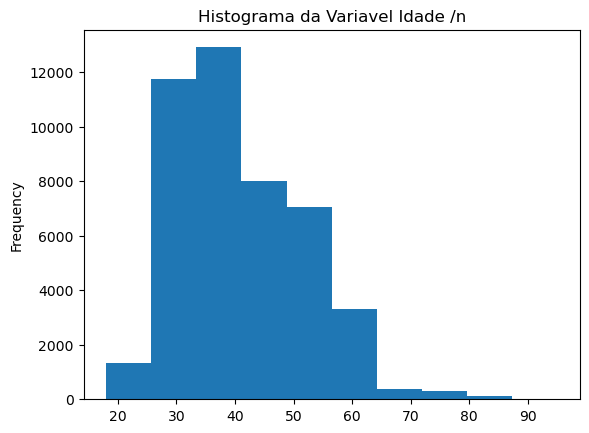

In [13]:
# Histograma 
df.age.plot(kind = "hist")
plt.title("Histograma da Variavel Idade /n")
plt.show()

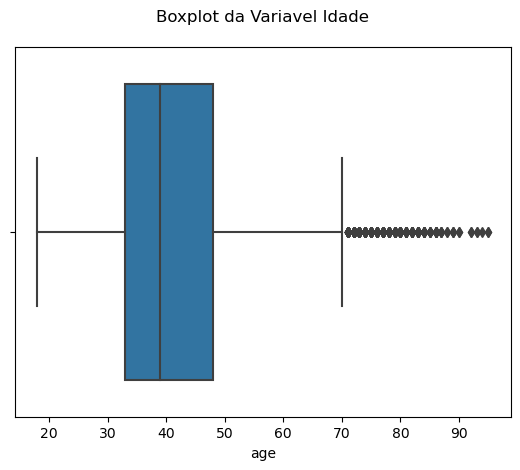

In [14]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variavel Idade\n")
plt.show()

In [15]:
# Vamos verificar qual e a media de idade.
df.age.mean()

40.93565090394105

In [16]:
# Vamos verificar qual e a mediana, valor do meio da distribuicao quando os dados estao ordenados.
df.age.median()

39.0

In [17]:
# vamos verificar qual e a moda, o valor que aparece com mais frequencia.
df.age.mode()

0    32.0
Name: age, dtype: float64

# Tratamento de Valores Ausentes

In [18]:
# valores ausentes na variavel
df.month.isnull().sum()

50

In [19]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [20]:
# tipo da variavel
df.month.dtypes

dtype('O')

In [21]:
# Categorias da variavel
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

# Tratamento de valores ausentes. 


- Vamos agora tratar a variavel que representa o salario. 

In [22]:
# Valores ausentes na variavel
df.salary.isnull().sum()

26

In [23]:
# Calcula o percentual de valores ausentes na variavel salary
df.salary.isnull().mean()*100

0.05750812855278583

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

Mas espere. Vamos checar algo aqui.

In [24]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


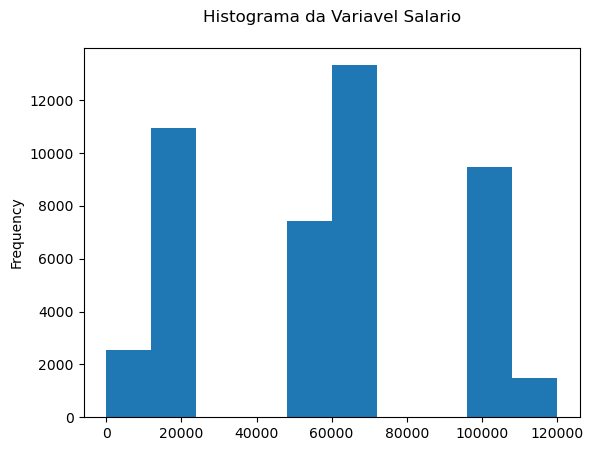

In [25]:
# Histograma
df.salary.plot(kind = 'hist')
plt.title("Histograma da Variavel Salario\n")
plt.show()

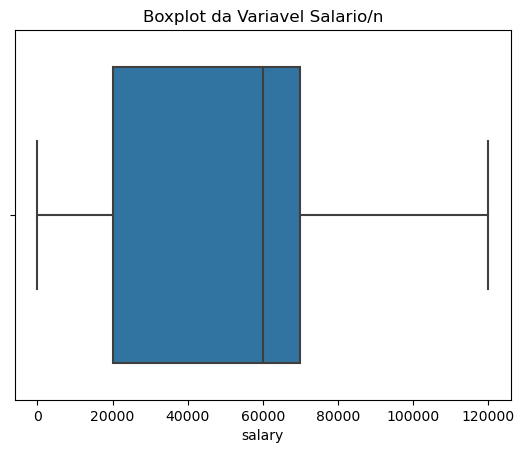

In [26]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variavel Salario/n")
plt.show()

In [27]:
# Vamos verificar qual e a media de idade.
df.salary.mean()

57008.65331415293

In [28]:
# Vamos verificar qual e a mediana.
df.salary.median()

60000.0

In [29]:
# Vamos verificar qual e a moda.
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

# Tratamento de Valores Ausentes

- Vamos agora tratar a variavel que representa a resposta (variavel alvo).

In [30]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [31]:
# Valores Ausentes 
df.response.isnull().sum()

30

In [32]:
# Calcula o percentual
df.response.isnull().mean()*100

0.0663555329455221

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

# Tratamento de Valores Ausentes

- Vamos agora tratar a variavel pdays. 

In [33]:
# Valores Ausentes
df.pdays.isnull().sum()

0

In [34]:
# Describe
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

In [35]:
# vamos fazer realce de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [36]:
# Valores ausentes
df.pdays.isnull().sum()

36954

In [37]:
# Calcula o percentual 
df.pdays.isnull().mean()*100

81.73674548229414